<a href="https://colab.research.google.com/github/farhanakbar8/k-nearest-neighbour/blob/main/Tupro_AI_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Intelligence Programming Assignment 3
Group 9 Members:
1. Andi Achmad Adjie (1301194264)
2. Muhammad Farhan Akbar (1301192246)
3. Muhammad Furqon Fahlevi (1301194214)

# Import libraries, such as: Pandas for file/data handling and math.sqrt for determining square root.

In [ ]:
import pandas as pd
from math import sqrt

# Import the data to a pandas data frame.

In [ ]:
data = pd.read_excel('https://github.com/farhanakbar8/k-nearest-neighbour/blob/main/mobil.xlsx?raw=true')
data.head()

,Nama Mobil,Ukuran,Kenyamanan,Irit,Kecepatan,Harga (Ratus Juta)
0,Toyota Agya,4,4,9,6,1.00
1,Daihatsu Alya,4,3,9,6,1.10
2,Toyota Avanza,6,5,6,6,2.00
3,Daihatsu Xenia,6,4,6,6,1.75
4,Xpander,7,7,6,7,2.25


# Data preprocessing.

In [ ]:
print(data.isna().sum())
car_arr = []

for i in range(len(data)):
  car_arr.append(data.iloc[i]['Nama Mobil'])

newdata = data.drop(columns=['Nama Mobil'])
newdata

Nama Mobil            0
Ukuran                0
Kenyamanan            0
Irit                  0
Kecepatan             0
Harga (Ratus Juta)    0
dtype: int64


,Ukuran,Kenyamanan,Irit,Kecepatan,Harga (Ratus Juta)
0,4,4,9,6,1.00
1,4,3,9,6,1.10
2,6,5,6,6,2.00
3,6,4,6,6,1.75
4,7,7,6,7,2.25
5,7,7,6,7,2.10
6,3,4,10,5,1.20
7,8,8,5,7,4.00
8,9,10,4,8,10.00
9,5,7,9,8,2.50


# Import the data test.

In [ ]:
data_test = pd.read_excel('https://github.com/farhanakbar8/k-nearest-neighbour/blob/main/test.xlsx?raw=true')
data_test

,Ukuran,Kenyamanan,Irit,Kecepatan,Harga (Ratus Juta)
0,10,4,10,7,1


# Euclidian Distance
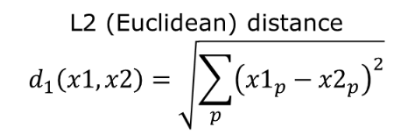

In [ ]:
def euclidDistance(x, y):
  return sqrt((x['Ukuran'] - y['Ukuran'])**2 + (x['Kenyamanan'] - y['Kenyamanan'])**2 + 
              (x['Irit'] - y['Irit'])**2 + (x['Kecepatan'] - y['Kecepatan'])**2 + (x['Harga (Ratus Juta)'] - y['Harga (Ratus Juta)'])**2)

# Manhattan Distance
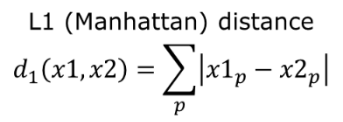

In [ ]:
def manhattanDistance(x, y):
  return (abs(x['Ukuran'] - y['Ukuran']) + abs(x['Kenyamanan'] - y['Kenyamanan']) + abs(x['Irit'] - y['Irit']) + 
          abs(x['Kecepatan'] - y['Kecepatan']) + abs(x['Harga (Ratus Juta)'] - y['Harga (Ratus Juta)']))

# Minkowski Distance
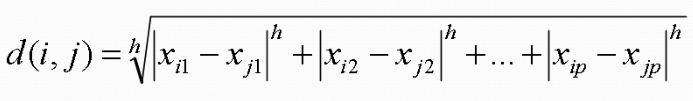

In [ ]:
def minkowskiDistance(x, y, h):
  return (abs(x['Ukuran'] - y['Ukuran']) + abs(x['Kenyamanan'] - y['Kenyamanan']) + abs(x['Irit'] - y['Irit']) + 
          abs(x['Kecepatan'] - y['Kecepatan']) + abs(x['Harga (Ratus Juta)'] - y['Harga (Ratus Juta)']))**1/h

# Supremum Distance
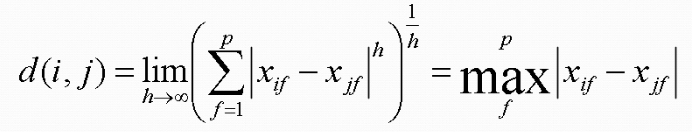

In [ ]:
def supremumDistance(x, y):
  return max(abs(x['Ukuran'] - y['Ukuran']), abs(x['Kenyamanan'] - y['Kenyamanan']), abs(x['Irit'] - y['Irit']), 
          abs(x['Kecepatan'] - y['Kecepatan']), abs(x['Harga (Ratus Juta)'] - y['Harga (Ratus Juta)']))

#kNN Classification

In [ ]:
k = 3
recommend_euclid = []
recommend_manhattan = []
recommend_minkowski = []
recommend_supremum = []

for i in range(len(newdata)):
  current_data = newdata.iloc[i]
  recommend_euclid.append([euclidDistance(current_data, data_test.iloc[0]), car_arr[i]])
  recommend_manhattan.append([manhattanDistance(current_data, data_test.iloc[0]), car_arr[i]])
  recommend_minkowski.append([minkowskiDistance(current_data, data_test.iloc[0], 4), car_arr[i]])
  recommend_supremum.append([supremumDistance(current_data, data_test.iloc[0]), car_arr[i]])

recommend_euclid.sort()
recommend_manhattan.sort()
recommend_minkowski.sort()
recommend_supremum.sort()



# Show the result

In [ ]:
result_euclid = recommend_euclid[:k]
for i in result_euclid:
  print(i)

[3.878143885933063, 'Suzuki Carry']
[4.69041575982343, 'Toyota Hiace']
[5.3563046963368315, 'Suzuki Ertiga']


In [ ]:
result_manhattan = recommend_manhattan[:k]
for i in result_manhattan:
  print(i)

[7.2, 'Suzuki Carry']
[8.0, 'Toyota Agya']
[8.0, 'Toyota Hiace']


In [ ]:
result_minkowski = recommend_minkowski[:k]
for i in result_minkowski:
  print(i)

[1.8, 'Suzuki Carry']
[2.0, 'Toyota Agya']
[2.0, 'Toyota Hiace']


In [ ]:
result_supremum = recommend_supremum[:k]
for i in result_supremum:
  print(i)

[3.0, 'Suzuki Carry']
[3.0, 'Suzuki Ertiga']
[4.0, 'Daihatsu Xenia']


# Export the result into excel files

In [ ]:
output_euclid = []
for i in result_euclid:
  output_euclid.append(i[1])
output_euclid = pd.DataFrame(data = output_euclid)
output_euclid.to_excel('Euclid.xlsx', index = False, header = False)

In [ ]:
output_manhattan = []
for i in result_manhattan:
  output_manhattan.append(i[1])
output_manhattan = pd.DataFrame(data = output_manhattan)
output_manhattan.to_excel('Manhattan.xlsx', index = False, header = False)

In [ ]:
output_minkowski = []
for i in result_minkowski:
  output_minkowski.append(i[1])
output_minkowski = pd.DataFrame(data = output_minkowski)
output_minkowski.to_excel('Minkowski.xlsx', index = False, header = False)

In [ ]:
output_supremum = []
for i in result_supremum:
  output_supremum.append(i[1])
output_supremum = pd.DataFrame(data = output_supremum)
output_supremum.to_excel('Supremum.xlsx', index = False, header = False)